In [1]:
#Housing Price Prediction using Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Data/housing_data.csv")

In [4]:
data

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Parking      1226 non-null   float64
 5   Price        1259 non-null   int64  
 6   Status       1259 non-null   object 
 7   Transaction  1259 non-null   object 
 8   Type         1254 non-null   object 
 9   Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 98.5+ KB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 1 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1005 non-null   float64
 1   BHK          1005 non-null   int64  
 2   Bathroom     1005 non-null   float64
 3   Furnishing   1005 non-null   object 
 4   Parking      1005 non-null   float64
 5   Price        1005 non-null   int64  
 6   Status       1005 non-null   object 
 7   Transaction  1005 non-null   object 
 8   Type         1005 non-null   object 
 9   Per_Sqft     1005 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 86.4+ KB


In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(['Price'],axis=1)
y = data['Price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [10]:
train_data = X_train.join(y_train)

In [11]:
train_data

,Area,BHK,Bathroom,Furnishing,Parking,Status,Transaction,Type,Per_Sqft,Price
1065,1260.0,3,3.0,Semi-Furnished,1.0,Ready_to_move,Resale,Apartment,8889.0,25000000
853,950.0,3,2.0,Unfurnished,1.0,Ready_to_move,Resale,Builder_Floor,4922.0,5000000
149,900.0,2,2.0,Unfurnished,1.0,Ready_to_move,Resale,Builder_Floor,7000.0,11000000
994,2500.0,4,4.0,Semi-Furnished,2.0,Ready_to_move,Resale,Builder_Floor,30000.0,75000000
1218,1600.0,3,4.0,Semi-Furnished,2.0,Ready_to_move,Resale,Builder_Floor,18055.0,27500000
...,...,...,...,...,...,...,...,...,...,...
406,805.0,2,2.0,Unfurnished,1.0,Ready_to_move,Resale,Builder_Floor,6111.0,4000000
828,540.0,1,1.0,Unfurnished,1.0,Ready_to_move,Resale,Builder_Floor,3148.0,1700000
438,2306.0,3,3.0,Unfurnished,1.0,Almost_ready,New_Property,Apartment,24718.0,57000000
485,2400.0,4,4.0,Semi-Furnished,1.0,Ready_to_move,New_Property,Apartment,2235.0,70000000


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'BHK'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Parking'}>],
       [<Axes: title={'center': 'Per_Sqft'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

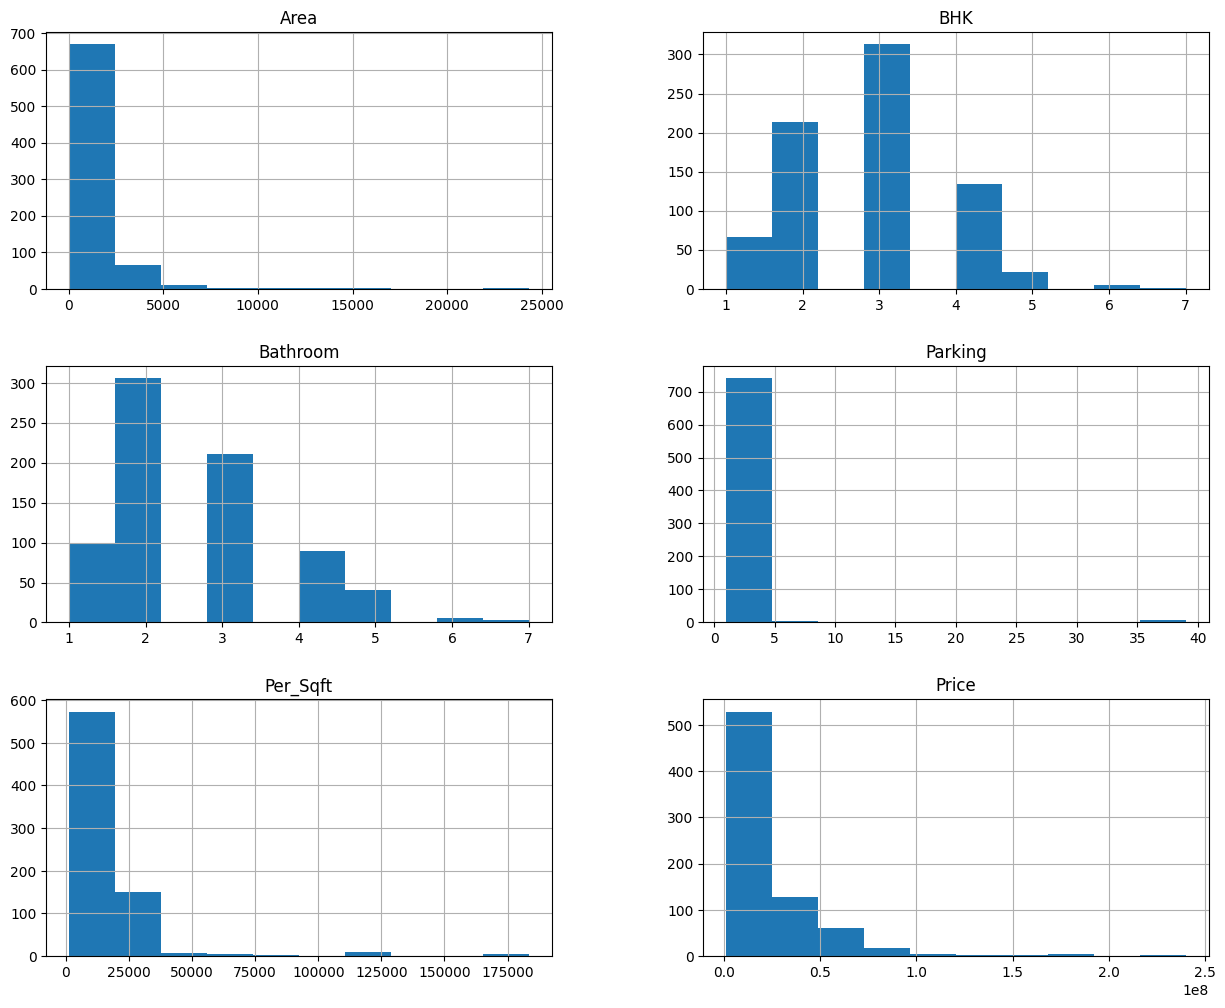

In [12]:
train_data.hist(figsize=(15,12))

In [13]:
#Pre-processing for correlation matrix
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data_corr = train_data.copy()
train_data_corr['Furnishing'] = label_encoder.fit_transform(train_data_corr['Furnishing'])
train_data_corr['Status'] = label_encoder.fit_transform(train_data_corr['Status'])
train_data_corr['Transaction'] = label_encoder.fit_transform(train_data_corr['Transaction'])
train_data_corr['Type'] = label_encoder.fit_transform(train_data_corr['Type'])


In [14]:
train_data_corr.corr()

,Area,BHK,Bathroom,Furnishing,Parking,Status,Transaction,Type,Per_Sqft,Price
Area,1.000000,0.450841,0.532845,0.007760,-0.002025,-0.167380,-0.134668,0.092606,0.133173,0.574916
BHK,0.450841,1.000000,0.809168,-0.137818,-0.103426,-0.163176,-0.176212,0.131179,0.168549,0.586986
Bathroom,0.532845,0.809168,1.000000,-0.053140,-0.045249,-0.170877,-0.212655,0.135176,0.190677,0.724774
Furnishing,0.007760,-0.137818,-0.053140,1.000000,0.094344,-0.065791,-0.015992,-0.070498,0.013521,0.020392
Parking,-0.002025,-0.103426,-0.045249,0.094344,1.000000,0.026711,0.022988,-0.077402,-0.005185,0.028575
Status,-0.167380,-0.163176,-0.170877,-0.065791,0.026711,1.000000,0.241352,0.085203,-0.020364,-0.240685
Transaction,-0.134668,-0.176212,-0.212655,-0.015992,0.022988,0.241352,1.000000,-0.201023,-0.025792,-0.233357
Type,0.092606,0.131179,0.135176,-0.070498,-0.077402,0.085203,-0.201023,1.000000,0.098253,0.091519
Per_Sqft,0.133173,0.168549,0.190677,0.013521,-0.005185,-0.020364,-0.025792,0.098253,1.000000,0.291632
Price,0.574916,0.586986,0.724774,0.020392,0.028575,-0.240685,-0.233357,0.091519,0.291632,1.000000


<Axes: >

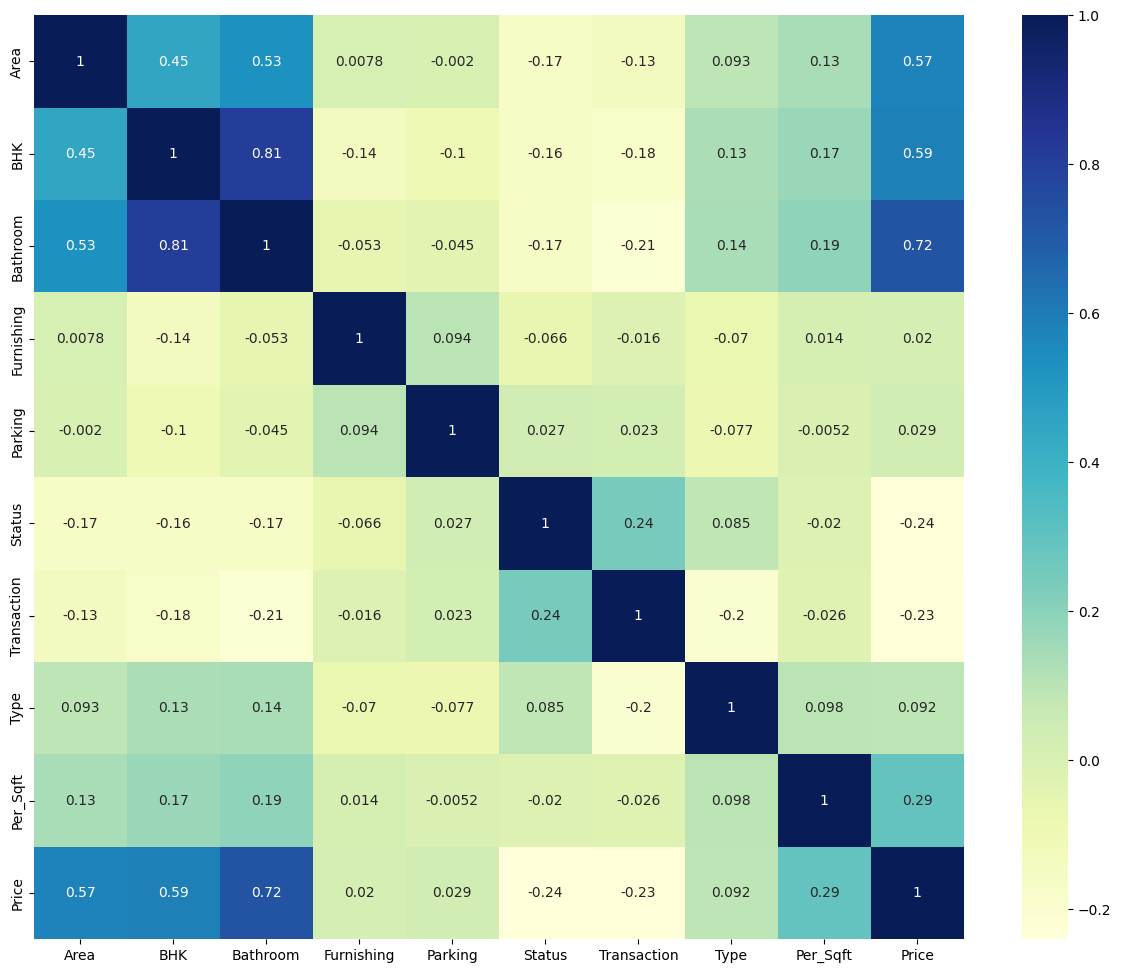

In [15]:
#to visualize correlation matrix

plt.figure(figsize=(15,12))
sns.heatmap(train_data_corr.corr(),annot=True,cmap="YlGnBu")


In [16]:
#Pre-processing
#Log-normal distribution

train_data['Area'] = np.log(train_data['Area']+1)
train_data['BHK'] = np.log(train_data['BHK']+1)
train_data['Bathroom'] = np.log(train_data['Bathroom']+1)
train_data['Parking'] = np.log(train_data['Parking']+1)
train_data['Per_Sqft'] = np.log(train_data['Per_Sqft']+1)
train_data['Price'] = np.log(train_data['Price']+1)


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'BHK'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Parking'}>],
       [<Axes: title={'center': 'Per_Sqft'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

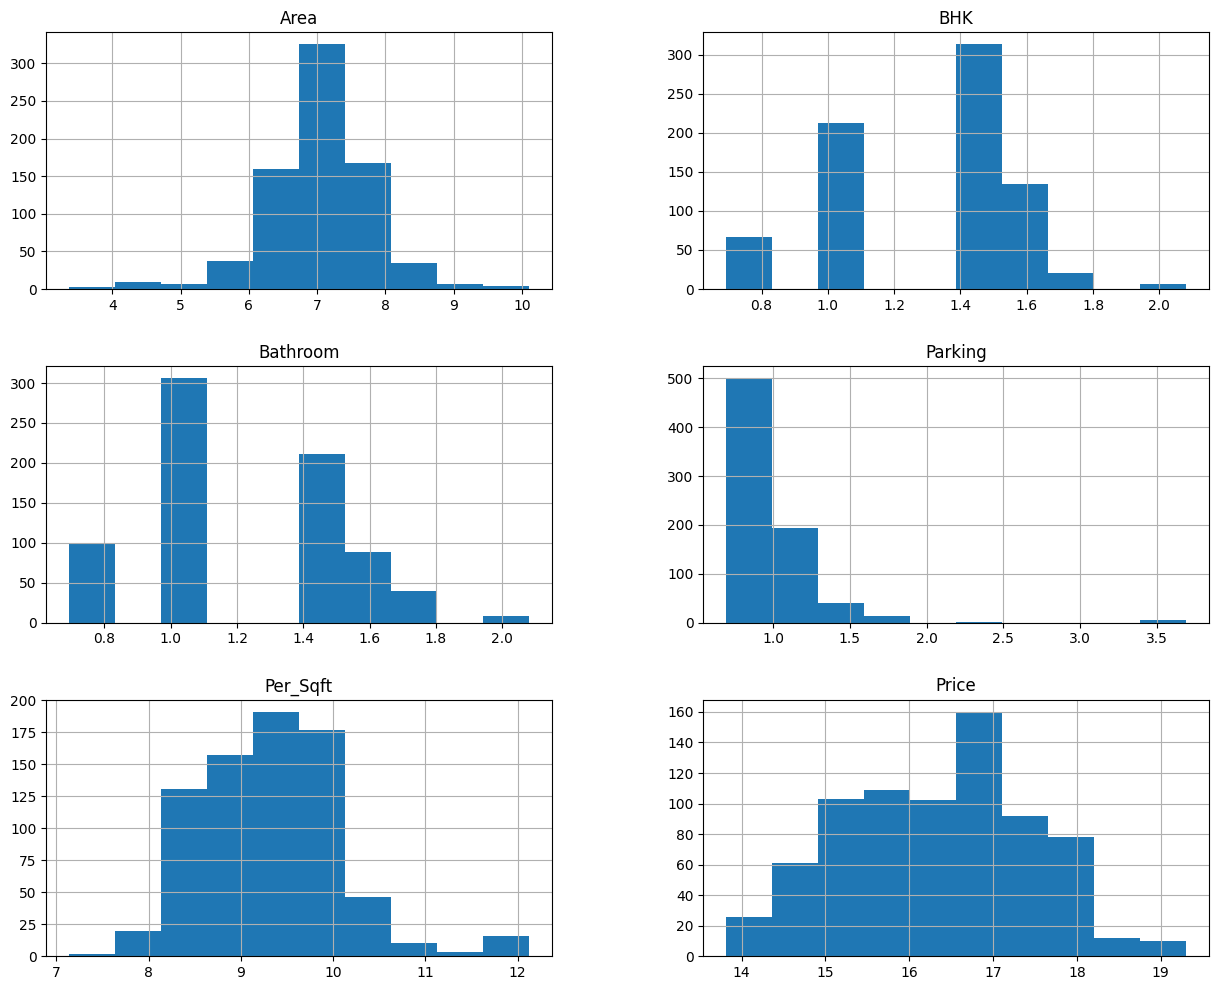

In [17]:
train_data.hist(figsize=(15,12))

In [18]:
train_data = train_data.join(pd.get_dummies(train_data.Furnishing,dtype='int')).drop(['Furnishing'],axis=1)
train_data = train_data.join(pd.get_dummies(train_data.Status,dtype='int')).drop(['Status'],axis=1)
train_data = train_data.join(pd.get_dummies(train_data.Transaction,dtype='int')).drop(['Transaction'],axis=1)
train_data = train_data.join(pd.get_dummies(train_data.Type,dtype='int')).drop(['Type'],axis=1)

In [19]:
train_data

,Area,BHK,Bathroom,Parking,Per_Sqft,Price,Furnished,Semi-Furnished,Unfurnished,Almost_ready,Ready_to_move,New_Property,Resale,Apartment,Builder_Floor
1065,7.139660,1.386294,1.386294,0.693147,9.092682,17.034386,0,1,0,0,1,0,1,1,0
853,6.857514,1.386294,1.098612,0.693147,8.501673,15.424949,0,0,1,0,1,0,1,0,1
149,6.803505,1.098612,1.098612,0.693147,8.853808,16.213406,0,0,1,0,1,0,1,0,1
994,7.824446,1.609438,1.609438,1.098612,10.308986,18.132999,0,1,0,0,1,0,1,0,1
1218,7.378384,1.386294,1.609438,1.098612,9.801233,17.129697,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,6.692084,1.098612,1.098612,0.693147,8.718009,15.201805,0,0,1,0,1,0,1,0,1
828,6.293419,0.693147,0.693147,0.693147,8.054840,14.346139,0,0,1,0,1,0,1,0,1
438,7.743703,1.386294,1.386294,0.693147,10.115327,17.858562,0,0,1,1,0,1,0,1,0
485,7.783641,1.609438,1.609438,0.693147,7.712444,18.064006,0,1,0,0,1,1,0,1,0


<Axes: >

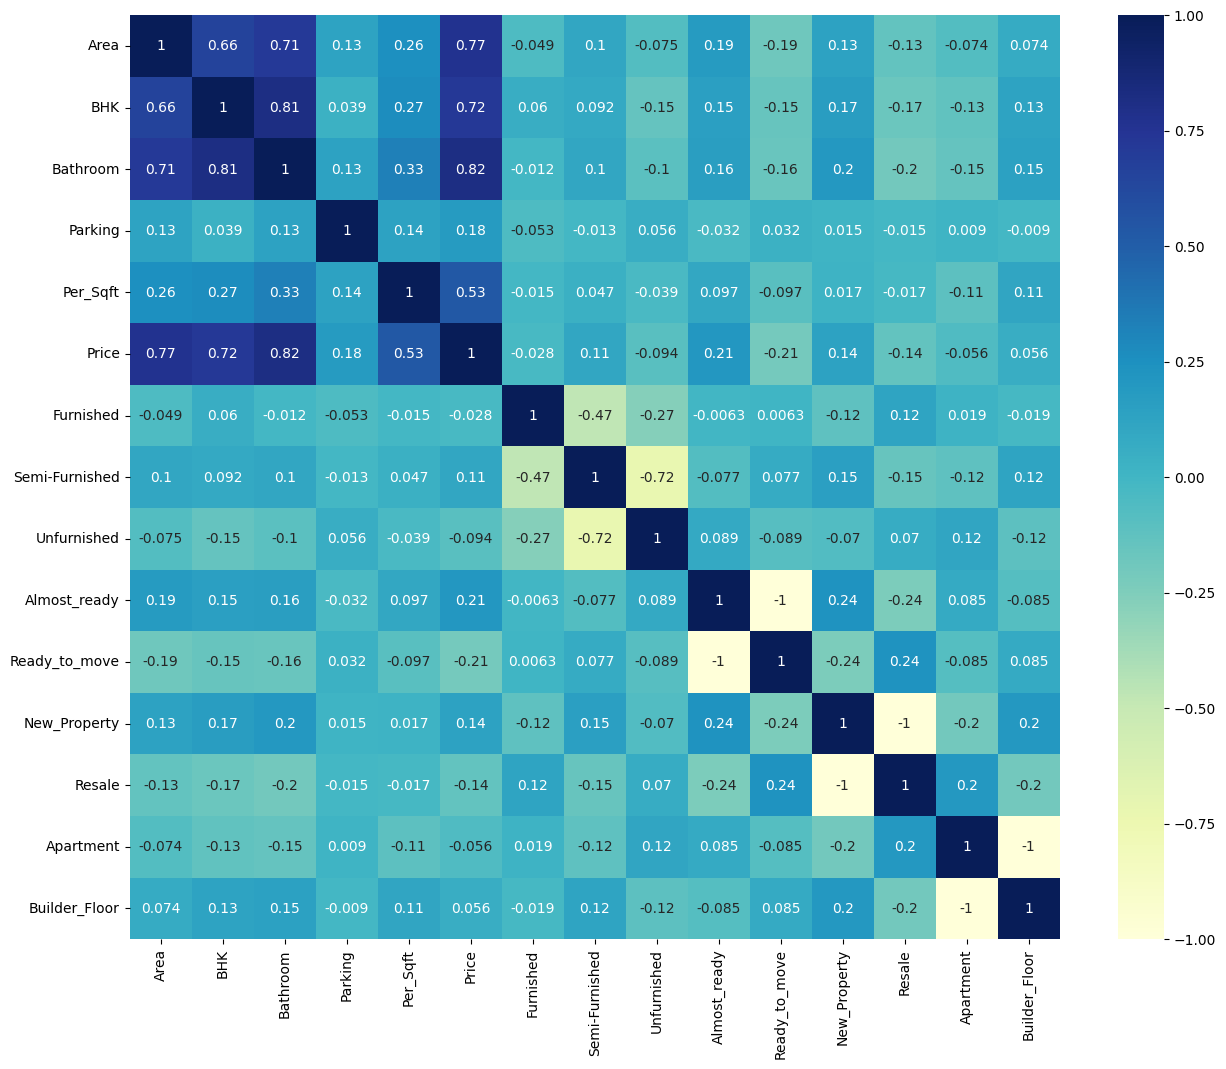

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [21]:
train_data.Price

1065    17.034386
853     15.424949
149     16.213406
994     18.132999
1218    17.129697
          ...    
406     15.201805
828     14.346139
438     17.858562
485     18.064006
102     17.504390
Name: Price, Length: 753, dtype: float64

In [22]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['Price'],axis=1), train_data['Price']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [23]:
test_data = X_test.join(y_test)

test_data['Area'] = np.log(test_data['Area']+1)
test_data['BHK'] = np.log(test_data['BHK']+1)
test_data['Bathroom'] = np.log(test_data['Bathroom']+1)
test_data['Parking'] = np.log(test_data['Parking']+1)
test_data['Per_Sqft'] = np.log(test_data['Per_Sqft']+1)
test_data['Price'] = np.log(test_data['Price']+1)

test_data = test_data.join(pd.get_dummies(test_data.Furnishing,dtype='int')).drop(['Furnishing'],axis=1)
test_data = test_data.join(pd.get_dummies(test_data.Status,dtype='int')).drop(['Status'],axis=1)
test_data = test_data.join(pd.get_dummies(test_data.Transaction,dtype='int')).drop(['Transaction'],axis=1)
test_data = test_data.join(pd.get_dummies(test_data.Type,dtype='int')).drop(['Type'],axis=1)

In [24]:
X_test, y_test = test_data.drop(['Price'],axis=1), test_data['Price']

In [25]:
test_data

,Area,BHK,Bathroom,Parking,Per_Sqft,Price,Furnished,Semi-Furnished,Unfurnished,Almost_ready,Ready_to_move,New_Property,Resale,Apartment,Builder_Floor
684,8.039480,1.791759,1.791759,1.386294,9.950753,17.989898,0,1,0,0,1,0,1,1,0
83,7.313887,1.386294,1.386294,1.098612,8.167636,16.588099,0,1,0,0,1,0,1,1,0
403,6.908755,1.386294,1.098612,0.693147,8.718009,15.640060,0,1,0,0,1,1,0,0,1
240,8.412055,1.609438,1.609438,1.098612,11.695255,17.909855,0,1,0,0,1,1,0,0,1
2,6.857514,1.098612,1.098612,0.693147,8.805075,16.556351,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,6.908755,1.098612,1.098612,0.693147,8.805075,15.830414,0,0,1,0,1,0,1,1,0
1130,6.908755,1.098612,1.098612,0.693147,8.962007,15.869634,0,1,0,0,1,0,1,1,0
398,6.111467,1.098612,0.693147,0.693147,8.718009,14.430697,0,1,0,0,1,1,0,0,1
827,6.752270,1.098612,1.098612,0.693147,8.450840,15.201805,0,1,0,0,1,0,1,0,1


In [26]:
reg.score(X_test,y_test)

0.7689887684835778